In [2]:
point = [0.2, 0.8]

In [3]:
triangle = [[0.2, 0.8],[0.5,0.2],[0.8,0.7]]

In [4]:
def points_to_triangle(point1, point2, point3):
    triangle = [list(point1), list(point2), list(point3)]
    return(triangle)

In [5]:
def genlines(listpoints, itinerary):
    lines=[]
    for j in range(len(itinerary)-1):
        lines.append([listpoints[itinerary[j]], listpoints[itinerary[j+1]]])
    return(lines)     

In [6]:
import pylab as pl
from matplotlib import collections as mc
def plot_triangle_simple(triangle, thename):
    fig, ax = pl.subplots()
    xs=[triangle[0][0], triangle[1][0], triangle[2][0]]
    ys=[triangle[0][1], triangle[1][1], triangle[2][1]]
    
    itin=[0,1,2,0]
    thelines = genlines(triangle, itin)
    lc = mc.LineCollection(genlines(triangle,itin), linewidths=2)
    ax.add_collection(lc)
    ax.margins(0.1)
    pl.scatter(xs,ys)
    pl.show()
    

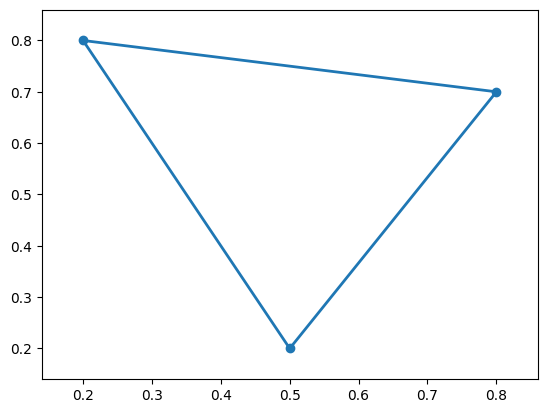

In [7]:
plot_triangle_simple(points_to_triangle((0.2,0.8),(0.5,0.2),(0.8,0.7)),'tri')

In [8]:
def get_distance(point1,point2):
    distance = math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    return(distance)

## Advanced Triangle Study

In [9]:
def triangle_to_circumcenter(triangle):
    x,y,z = complex(triangle[0][0], triangle[0][1]), \
            complex(triangle[1][0], triangle[1][1]), \
            complex(triangle[2][0], triangle[2][1])
    #calculate the complex number w
    w=z-x
    w /= y-x
    
    #calculate the complex number c which represents the circumcenter
    c = (x-y) * (w-abs(w)**2)/2j/w.imag-x
    
    # calculate the circumradius
    radius = abs(c+x)
    
    
    return((0-c.real,0-c.imag),radius)

In [10]:
triangle_to_circumcenter([(0.2,0.8),(0.5,0.2),(0.8,0.7)])

((0.46818181818181825, 0.5590909090909091), 0.36049781925269736)

In [11]:
def plot_triangle(triangles, centers, radii, thename):
    fig, ax = pl.subplots()
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    
    #print(center)
    
    for i in range(len(triangles)):
        triangle = triangles[i]
        
        # this is add a second empty tuple
        center = centers[i]
        radius = radii[i]
        itin=[0,1,2,0]
        thelines = genlines(triangle, itin)  
        xs=[triangle[0][0], triangle[1][0], triangle[2][0]]
        ys=[triangle[0][1], triangle[1][1], triangle[2][1]]
        lc = mc.LineCollection(genlines(triangle,itin), linewidths=2)
        ax.add_collection(lc)
        ax.margins(0.1)
        pl.scatter(xs,ys)
        pl.scatter(center[0],center[0])
        
        circle=pl.Circle(center, radius, color='b', fill=False)
        ax.add_artist(circle)
    pl.show()

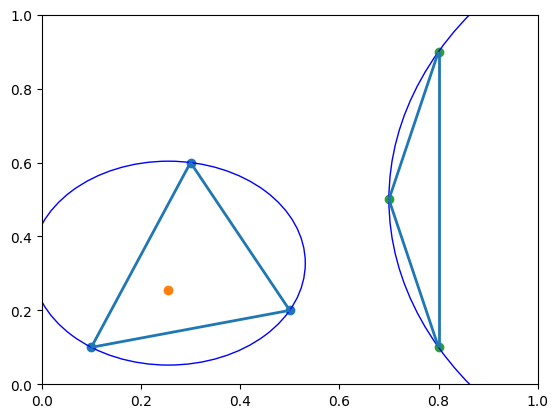

In [12]:
triangle1 = points_to_triangle((0.1,0.1),(0.3,0.6),(0.5,0.2))
center1, radius1 = triangle_to_circumcenter(triangle1)
triangle2 = points_to_triangle((0.8,0.1),(0.7,0.5),(0.8,0.9))
center2, radius2 = triangle_to_circumcenter(triangle2)
plot_triangle([triangle1,triangle2],[center1,center2],[radius1,radius2], 'two')

## Delaunay Triangulation

In [13]:
import math

In [22]:
def gen_delaunay(points):
    #delaunay = [points_to_triangle([-5,5],[-5,10],[10,-5])]
    delaunay = [points_to_triangle([0.2,0.8],[0.5,0.2],[0.8,0.7])] 
    number_of_points = 0
    
    while number_of_points < len(points):
        point_to_add = points[number_of_points]
        delaunay_index=0
        invalid_triangles = []
        while delaunay_index < len(delaunay):
            circumcenter, radius = triangle_to_circumcenter(delaunay[delaunay_index])
            new_distance=get_distance(circumcenter, point_to_add)
            if new_distance<radius:
                invalid_triangles.append(delaunay[delaunay_index])
            delaunay_index +=1
        points_in_invalid=[]
        for i in range(0,len(invalid_triangles)):
            delaunay.remove(invalid_triangles[i])
            for j in range(0, len(invalid_triangles[i])):
                points_in_invalid.append(invalid_triangles[i][j])
        points_in_invalid=[list(x) for x in set(tuple(x) for x in points_in_invalid)]
        
        for i in range(0,len(points_in_invalid)):
            for j in range(i+1, len(points_in_invalid)):
                count_occurrences = 0 
                for k in range(0,len(invalid_triangles)):
                    count_occurrences += 1* (points_in_invalid[i] in invalid_triangles[k]) *\
                    (points_in_invalid[j] in invalid_triangles[k])
                if count_occurrences==1:
                    delaunay.append(points_to_triangle(points_in_invalid[i], \
                                points_in_invalid[j], point_to_add))
        number_of_points +=1
    return delaunay
    

In [23]:


N=15
import numpy as np
np.random.seed(5201314)
xs = np.random.rand(N)
ys = np.random.rand(N)
points = zip(xs, ys)
list_points = list(points)
the_delaunay = gen_delaunay(list_points)
print(the_delaunay)

[[[0.2, 0.8], [0.2809647089627413, 0.7203959695096005], [0.03422232183551488, 0.7963566458891637]], [[0.2, 0.8], [0.2809647089627413, 0.7203959695096005], [0.32416321633679257, 0.7175784511244421]], [[0.2, 0.8], [0.03422232183551488, 0.7963566458891637], [0.32416321633679257, 0.7175784511244421]], [[0.2809647089627413, 0.7203959695096005], [0.36086548599077317, 0.6538039960174709], [0.32416321633679257, 0.7175784511244421]], [[0.2, 0.8], [0.32416321633679257, 0.7175784511244421], [0.4799393976918396, 0.6724831049176895]], [[0.2, 0.8], [0.8, 0.7], [0.4799393976918396, 0.6724831049176895]], [[0.32416321633679257, 0.7175784511244421], [0.36086548599077317, 0.6538039960174709], [0.4799393976918396, 0.6724831049176895]], [[0.8, 0.7], [0.509415567428295, 0.5406468488840412], [0.4799393976918396, 0.6724831049176895]], [[0.36086548599077317, 0.6538039960174709], [0.509415567428295, 0.5406468488840412], [0.4799393976918396, 0.6724831049176895]], [[0.2, 0.8], [0.32416321633679257, 0.717578451124

## From Delaunay to Voronoi

# Did not work

In [28]:
def plot_triangle_circum(triangles, centers, \
                         plotcircles, plotpoints, \
                         plottriangles, plotvoronoi, \
                         plotvpoints, thename):
    fig, ax = pl.subplots()
    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    
    lines=[]
    for i in range(len(triangles)):
        triangle = triangles[i]
        
        # this is add a second empty tuple
        center = centers[i][0]
        radius = centers[i][1]
        itin=[0,1,2,0]
        thelines = genlines(triangle, itin)  
        xs=[triangle[0][0], triangle[1][0], triangle[2][0]]
        ys=[triangle[0][1], triangle[1][1], triangle[2][1]]
        lc = mc.LineCollection(genlines(triangle,itin), linewidths=2)
        
        if(plottriangles):
            ax.add_collection(lc)
        if(plotpoints):
            pl.scatter(xs,ys)
            
        ax.margins(0.1)
        
        if (plotvpoints):
            pl.scatter(center[0],center[1])
        
        circle=pl.Circle(center, radius, color='b', fill=False)
        if (plotcircles):
            ax.add_artist(circle)
        
        if(plotvoronoi):
            for j in range(0,len(triangles)):
                commonpoints=0
                for k in range(0,len(triangles[i])):
                    for n in range(0,len(triangles[j])):
                        if triangles[i][k]==triangles[j][n]:
                            commonpoints+=1
                if commonpoints == 2:
                    lines.append([list(centers[i][0]),list(centers[j][0])])
        lc = mc.LineCollection(lines, linewidths=1)
        ax.add_collection(lc)
        
    pl.show()

In [29]:
circumcenters=[]
for i in range(0,len(the_delaunay)):
    circumcenters.append(triangle_to_circumcenter(the_delaunay[i]))

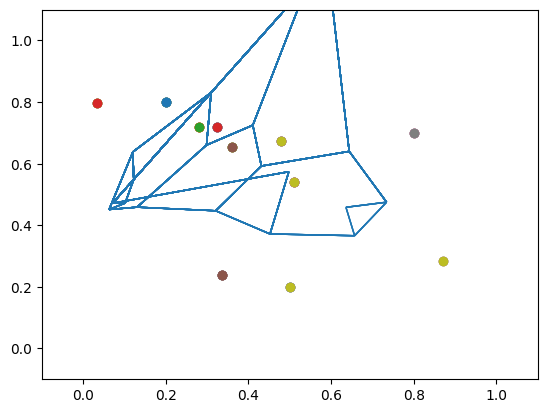

In [30]:
plot_triangle_circum(the_delaunay, circumcenters, False, True, False, True, False, 'final')

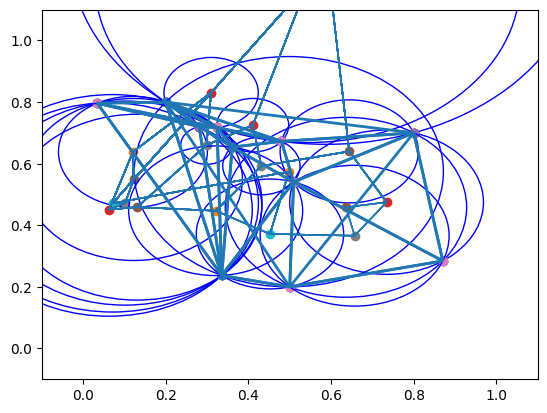

In [31]:
plot_triangle_circum(the_delaunay, circumcenters, True, True, True, True, True, 'final')